In [1]:
%matplotlib notebook
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

In [2]:
s1_lat = 6 
sn = 'S'   # S = south, N = north
s1_lon = 21 
ew = 'W'  # E = east, W = west
s2_lat = 10 
sn2 = 'S' # S = south, N = north
s2_lon = 30 
ew2 = 'S' # E = east, W = west

In [3]:
#This is a conversion for East/west/north/south
#http://www.nature1st.net/bogan/astro/sun/sunspots.html
# I don't quite understand why, but East and West are changed around ...
if (sn=='S'):
    s1_lat=360-s1_lat

if (ew == 'E'):
    s1_lon=360-s1_lon

if (ew2 == 'E'):
    s2_lon=360-s2_lon

if (sn2=='S'):
    s2_lat = 360-s2_lat


# This calculates the cartesian equivalents of the sunspots

In [4]:

xs = 1 * np.cos(s1_lat*np.pi/180)*np.cos(s1_lon*np.pi/180)
ys = 1 * np.cos(s1_lat*np.pi/180)*np.sin(s1_lon*np.pi/180)
zs = 1 * np.sin(s1_lat*np.pi/180)
xs2 = 1 * np.cos(s2_lat*np.pi/180)*np.cos(s2_lon*np.pi/180)
ys2 = 1 * np.cos(s2_lat*np.pi/180)*np.sin(s2_lon*np.pi/180)
zs2 = 1 * np.sin(s2_lat*np.pi/180)

# Now we will calculate the distance between 

In [14]:

# Distance calculation
rlat1  = s1_lat/180*math.pi
rlat2  = s2_lat/180*math.pi
rlong1 = s1_lon/180*math.pi
rlong2 = s2_lon/180*math.pi
r_sun = 695700 # km
hlat = math.sin(0.5*(rlat2-rlat1))**2
hlon = math.sin(0.5*(rlong2-rlong1))**2

d = round(2 * r_sun * math.asin(math.sqrt(hlat + math.cos(rlat1)*math.cos(rlat2)*hlon)),0)
print('The distance between sunspot A and B is: ' + str(d) + ' km ')

The distance between sunspot A and B is: 118593.0 km 


#  Yay! We've got a distance! Now we will try to make a 3D-position reconstruction.

<IPython.core.display.Javascript object>


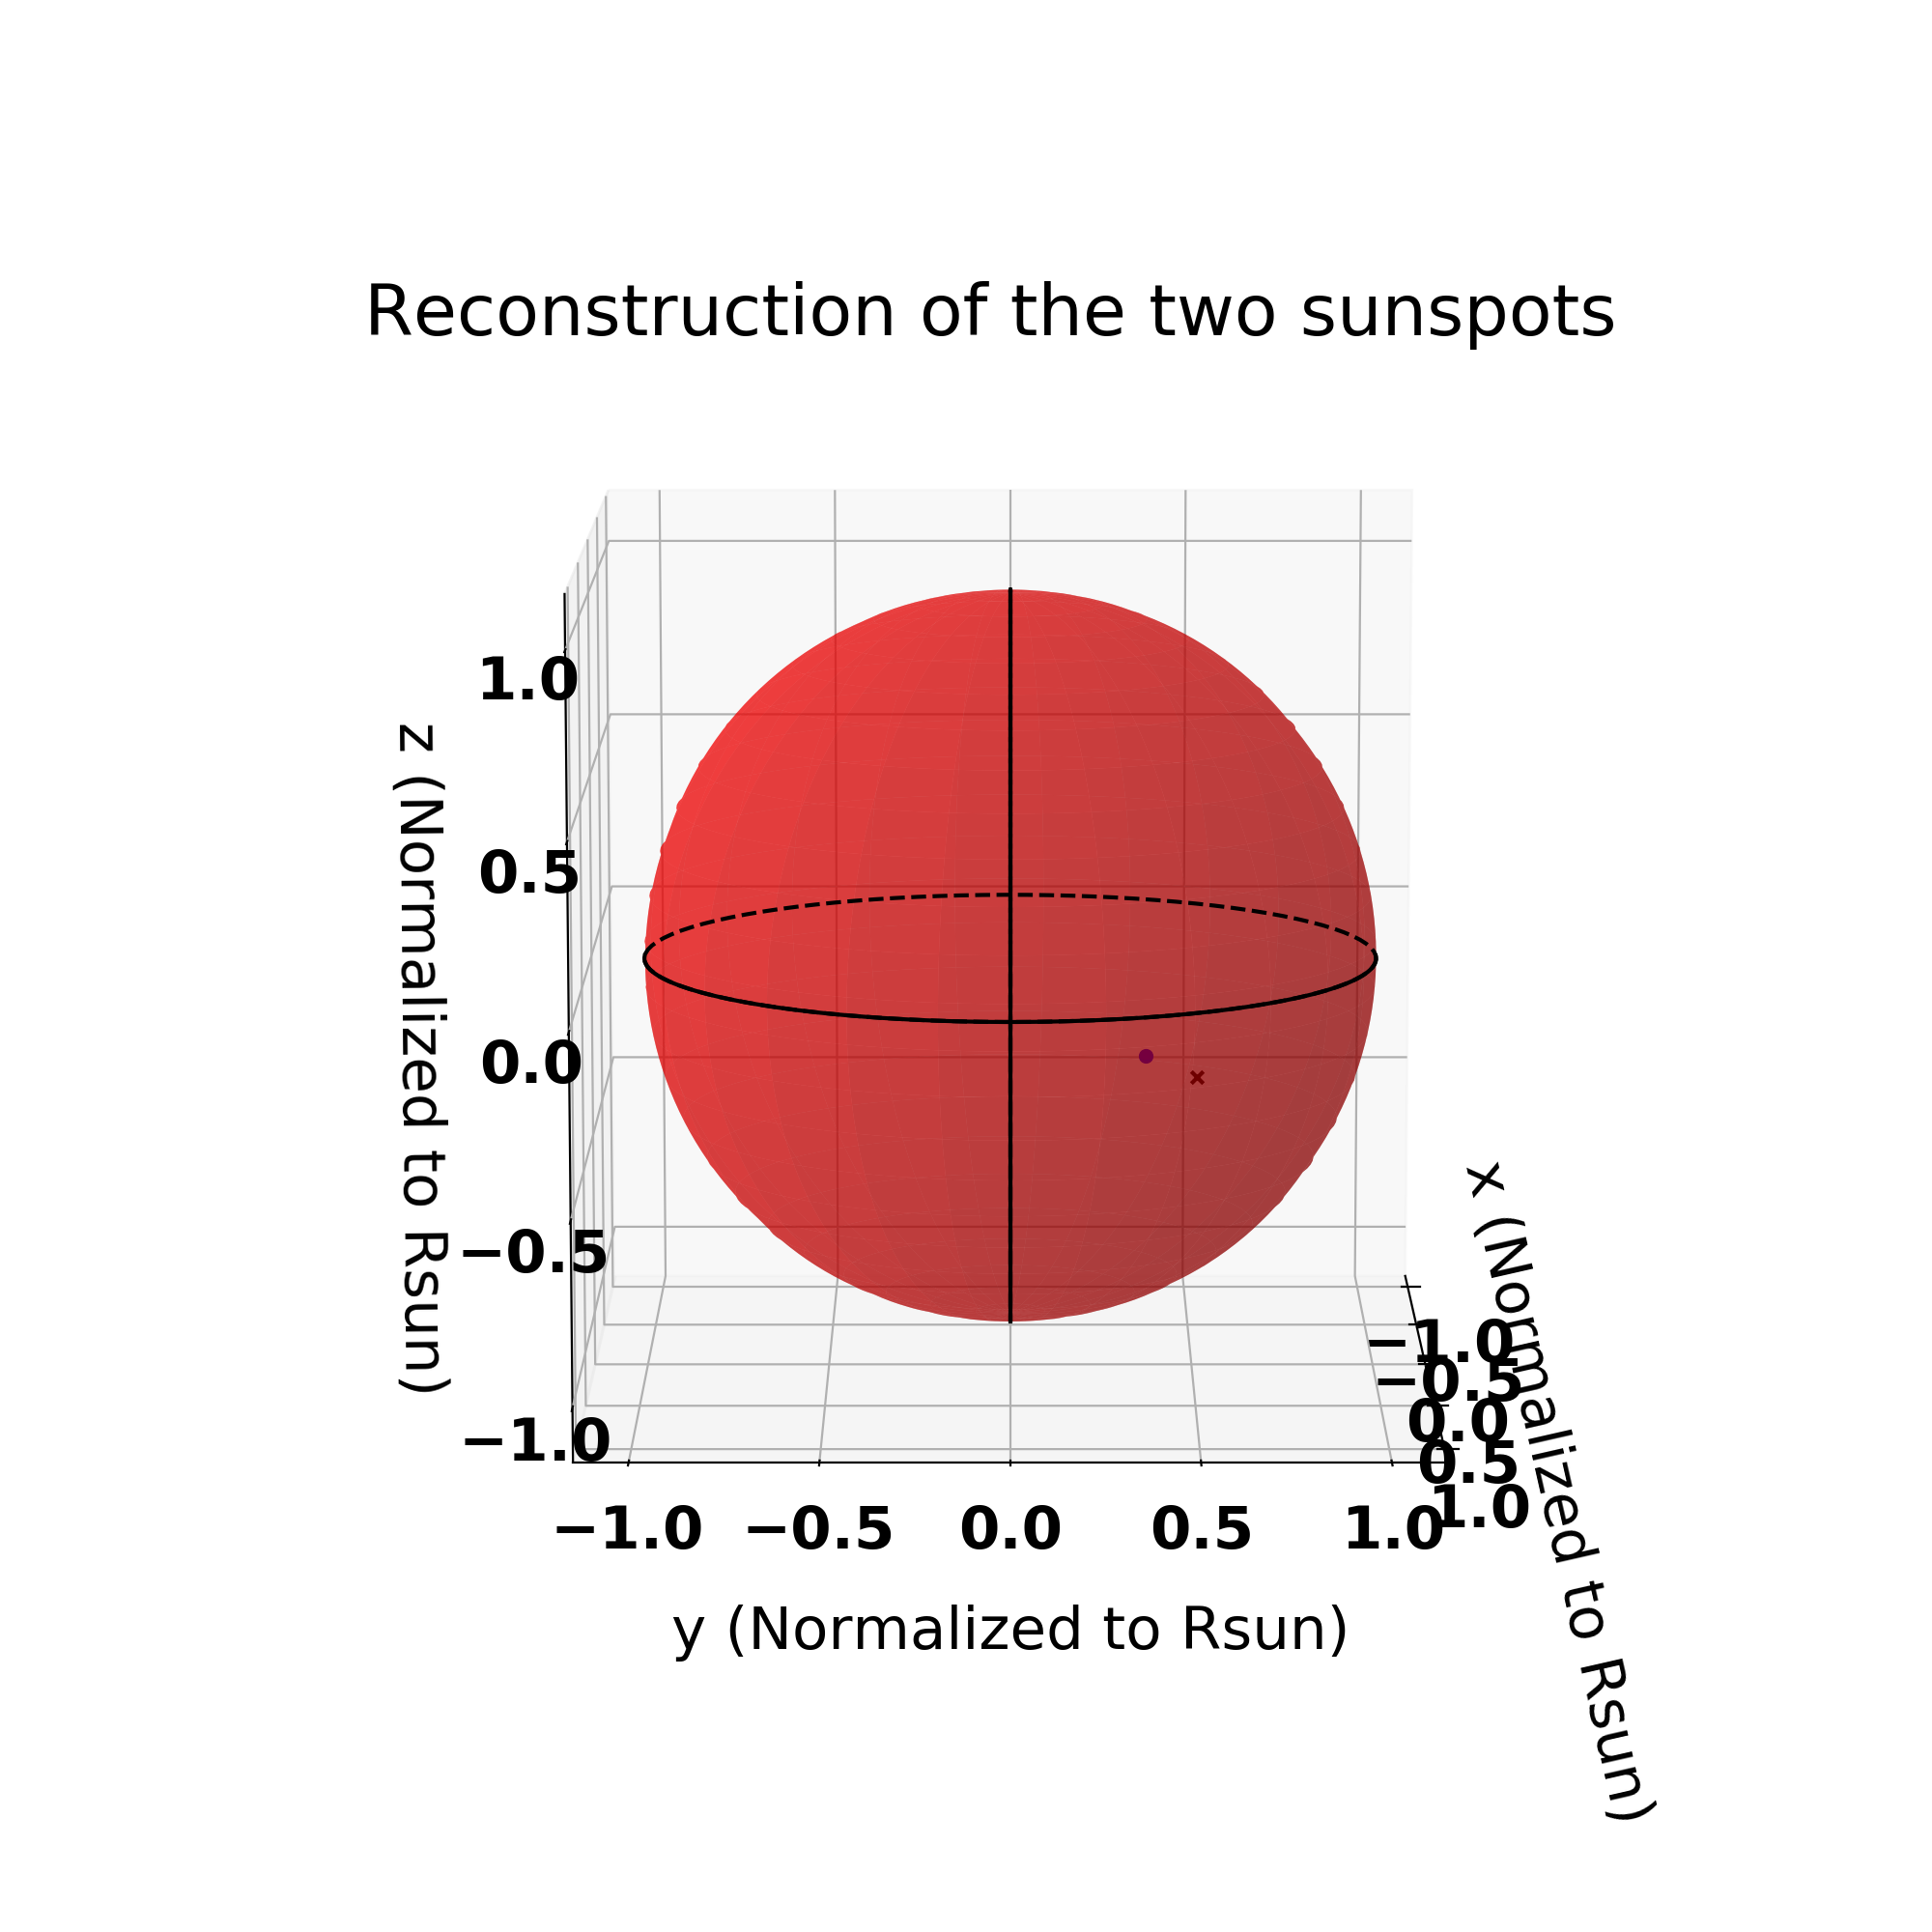

In [15]:
fig = plt.figure()
fig.set_size_inches(10,10)
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')
#u,v,x,y,z are to define a red circle
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 1 * np.outer(np.cos(u), np.sin(v))
y = 1 * np.outer(np.sin(u), np.sin(v))
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))
elev = 10.0
rot = 90 / 180 * np.pi
ax.plot_surface(x,y,z,  rstride=4, cstride=4, color='r', linewidth=0, alpha=0.5)
ax.scatter(xs,ys,zs,marker='o',color='b') #Sunspot A marked by a circle
ax.scatter(xs2,ys2,zs2, marker='x',color='k') #Sunspot B marked by a cross

a = np.array([-np.sin(elev / 180 * np.pi), 0, np.cos(elev / 180 * np.pi)])
b = np.array([0, 1, 0])
b = b * np.cos(rot) + np.cross(a, b) * np.sin(rot) + a * np.dot(a, b) * (1 - np.cos(rot))
ax.plot(np.sin(u),np.cos(u),0,color='k', linestyle = 'dashed')
horiz_front = np.linspace(0, np.pi, 100)
ax.plot(np.sin(horiz_front),np.cos(horiz_front),0,color='k')
vert_front = np.linspace(np.pi / 2, 3 * np.pi / 2, 100)
ax.set_title("Reconstruction of the two sunspots")
ax.set_xlabel("x (Normalized to Rsun)",labelpad=25)
ax.set_ylabel("y (Normalized to Rsun)",labelpad=25)
ax.set_zlabel("z (Normalized to Rsun)",labelpad=25)

#ax.set_xticks([])
ax.plot(a[0] * np.sin(u) + b[0] * np.cos(u), b[1] * np.cos(u), a[2] * np.sin(u) + b[2] * np.cos(u),color='k', linestyle = 'dashed')
ax.plot(a[0] * np.sin(vert_front) + b[0] * np.cos(vert_front), b[1] * np.cos(vert_front), a[2] * np.sin(vert_front) + b[2] * np.cos(vert_front),color='k')

ax.view_init(elev = elev, azim = 0)
plt.show()


# Our vision from earth is the y-z plane. The dashed lines indicate the part of the sun turned away from us. Logically one cannot see sunspots. In this plot, the values of x, y and z are normalized to the radius of the sun. 

In [17]:
print('The distance between sunspot A and B is ±: ' + str(d) + ' km ')

The distance between sunspot A and B is ±: 118593.0 km 
